In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy import exp, cos, sin
from numpy.linalg import norm
import seaborn as sns
import time

#Exercise 3.1: Convergence of sequences:#

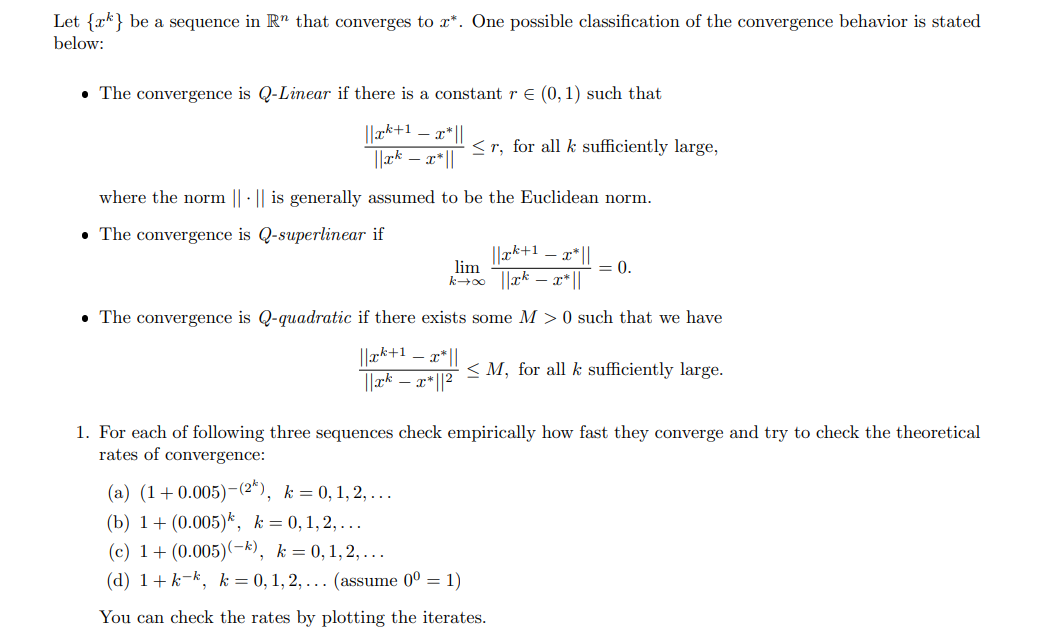

In [ ]:
tolerance = 1e-8


def seq1(k):
  return (1+0.005)**(-(2^k))

prev = seq1(0)
current = seq1(1)
k = 2
while abs(current - prev) > tolerance:
  prev= current
  current = seq1(k)
  k += 1

print(f'Converged seq for 1 is x* = {seq1(k)} and time for convergence k = {k}')

Converged seq for 1 is x* = 1.9903316853638217e-06 and time for convergence k = 2634


In [ ]:
tolerance = 1e-8


def seq2(k):
  return (1+0.005**k)

prev = seq2(0)
current = seq2(1)
k = 2
while abs(current - prev) > tolerance:
  prev= current
  current = seq2(k)
  k += 1

print(f'Converged seq for 2 is x* = {seq2(k)} and time for convergence k = {k}')

Converged seq for 2 is x* = 1.0000000000000155 and time for convergence k = 6


In [ ]:
tolerance = 1e-8

def seq3(k):
  return (1+(0.005**(-k)))

prev = seq3(0)
current = seq3(1)
k = 2
while abs(current - prev) > tolerance:
  prev= current
  current = seq3(k)
  k += 1

print(f'Converged seq for 3 is x* = {seq3(k)} and time for convergence k = {k}')

OverflowError: (34, 'Numerical result out of range')

which means sequence is diverging

In [ ]:
tolerance = 1e-8

def seq4(k):
  return (1+(k**(-k)))

for k in range(2,100):
  print(seq4(k))

1.25
1.037037037037037
1.00390625
1.00032
1.0000214334705075
1.000001214265679
1.0000000596046448
1.0000000025811748
1.0000000001
1.000000000003505
1.0000000000001121
1.0000000000000033
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


converging to 1.

#Exercise 3.2: Data Preparation Exercise (PREP)#

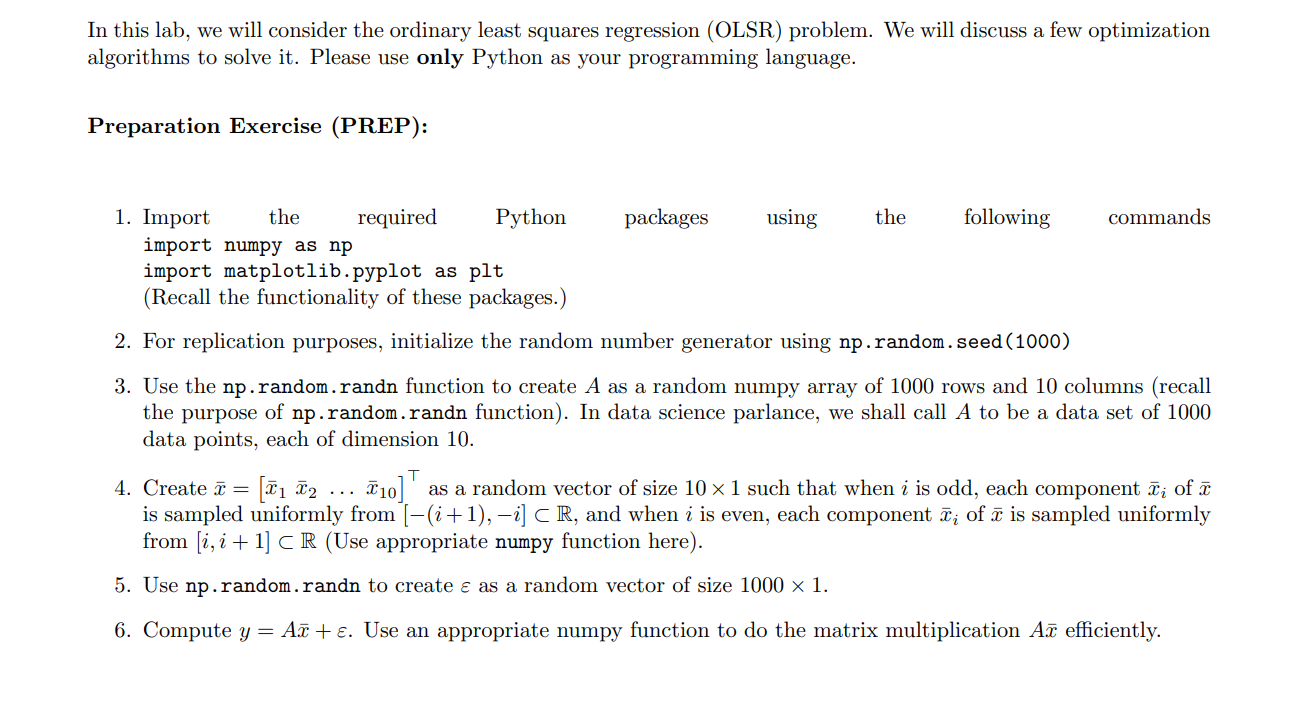

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)
A = []
for i in range(1000):
  row = []
  for j in range(10):
    row.append(np.random.randn())
  A.append(row)
A = np.array(A)
A.shape

(1000, 10)

In [ ]:
A[10:14]

array([[-0.39031935, -0.58069634,  1.94898697, -1.86255134, -0.56835658,
         0.97922403,  0.89536389, -0.23626245,  0.44109793, -0.99241399],
       [ 0.29550499,  0.04215969,  0.76213902,  0.62795647,  0.10712324,
        -1.55526284, -2.90585418,  0.75576283, -1.29956225, -0.86502249],
       [-1.18799428, -0.97881451, -1.96300125, -0.47853119,  1.08223608,
         1.10308709,  0.68998145,  0.32137876, -0.60046522, -0.16970945],
       [-1.39456835, -0.21324829,  1.28449338,  0.58563634, -0.56827215,
        -0.0438312 ,  0.95258674, -0.32737543, -0.45769825,  0.35132602]])

In [ ]:
xbar = []
for i in range(1,11):
  if i%2 == 1 :
    xbar.append(np.random.uniform(-(i+1), -i))
  else:
    xbar.append(np.random.uniform(i, i+1))
xbar = np.array(xbar)
xbar.shape

(10,)

In [ ]:
ep = np.array([np.random.randn() for i in range(1000)])
ep[:10]

array([ 0.1138107 ,  1.38065139, -0.08753441,  0.61741621, -0.55165179,
        0.93578648,  0.33428975, -0.62858215, -1.14607752, -2.23873191])

In [ ]:
y = A@xbar + ep

In [ ]:
y.shape

(1000,)

In [ ]:
y[0]

-3.8494354578410004

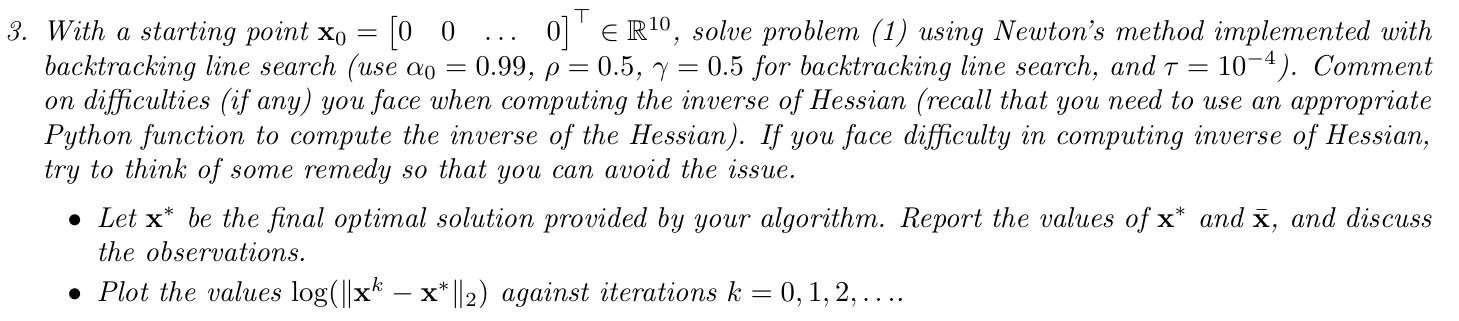

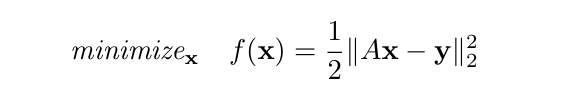

Note that $f(x) = \frac{1}{2}\|Ax-y\|_2^2$

$⇒\nabla_x{f(x)} = A^TAx - A^Ty$

$\nabla_x^2{f(x)} = A^TA$

In [ ]:
def fx(x):
  return 0.5*(norm(A@x-y)**2)

def grad_fx(x):
  return np.dot(A.transpose(), A)@x - A.transpose()@y

def hessian_fx():
  return A.transpose()@A

def dk_fx():
  return np.linalg.inv(hessian_fx())

def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  xk = np.copy(x0)
  count = 0
  pk = grad_fx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_fx()
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = grad_fx(xk)
    xks.append(xk)
    count += 1
  return count, xk, fx(xk), xks

#initializations
x0 = np.array([0 for _ in range(10)])
tau = 1e-4
alpha0 = 0.99
rho = 0.5
gamma = 0.5
print("iteration |final minimizer    | final value       |type    ")
print("---------------------------------------------------------------------------")
start = time.time()
count2, final_xk2, final_val2, xks2= newton_method_with_backtracking(x0, tau, alpha0, rho, gamma)
newtontime = time.time() - start
print(f"{count2}   |{final_xk2}    |{final_val2}     | newton with backtracking")
print("---------------------------------------------------------------------------")

iteration |final minimizer    | final value       |type    
---------------------------------------------------------------------------
5   |[-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195  6.89877618
 -7.62879358  8.16821112 -9.22221199 10.05669293]    |505.647329524551     | newton with backtracking
---------------------------------------------------------------------------


In [ ]:
print(xbar)

[-1.06258705  2.94307072 -3.34150552  4.58252615 -5.75947573  6.93512469
 -7.61893094  8.16818187 -9.2179964  10.00022174]


In [ ]:
print(final_xk2)

[-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195  6.89877618
 -7.62879358  8.16821112 -9.22221199 10.05669293]


In [ ]:
print(fx(xbar))

509.09949550233864


Note that $x^*$ is really close to $\bar{x}$ . Newton's method for linear regression can converge quickly when the cost function is well-behaved and the initial guess for the parameters is close to the optimal solution. However, it may face challenges with ill-conditioned Hessian matrices or when the cost function has local minima or saddle points.

Text(0.5, 1.0, 'Plot of log norm of ||xbar-xk|| in iterations')

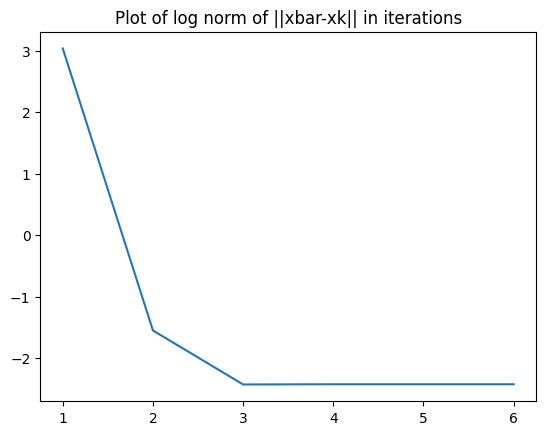

In [ ]:
norms = [np.log(norm(xbar-xk)) for xk in xks2]
iterations = [i+1 for i in range(count2+1)]
plt.plot(iterations, norms)
plt.title("Plot of log norm of ||xbar-xk|| in iterations")

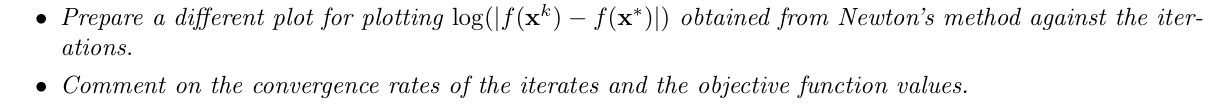

Text(0.5, 1.0, 'Plot of log absolute of function values difference vs iterations')

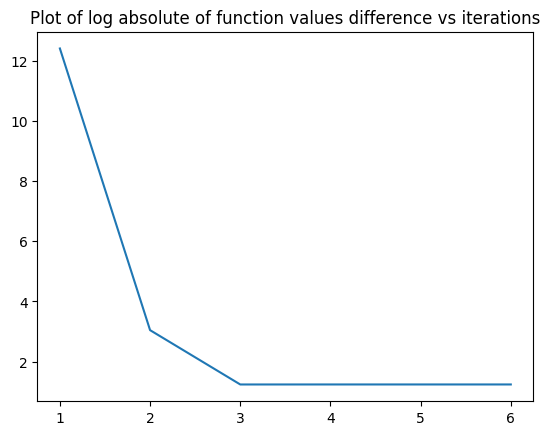

In [ ]:
norms = [np.log(abs(fx(xbar)-fx(xk))) for xk in xks2]
iterations = [i+1 for i in range(count2+1)]
plt.plot(iterations, norms)
plt.title("Plot of log absolute of function values difference vs iterations")

Convergence of the iterates:

Newton's method typically exhibits quadratic convergence near the optimal solution when the objective function is strongly convex. This means that the distance between consecutive iterates decreases quadratically as the algorithm progresses towards the optimal solution.
However, the convergence rate may be slower when the Hessian matrix is ill-conditioned or the optimization problem has degenerate regions. In such cases, the iterates may converge more slowly or exhibit oscillatory behavior.
Additionally, Newton's method may not converge at all if the Hessian matrix is not positive definite, leading to divergence or convergence to saddle points.
Convergence of the objective function values:

In ideal conditions where the objective function is strongly convex and the Hessian matrix is well-conditioned, Newton's method achieves quadratic convergence of the objective function values. This means that the value of the objective function decreases quadratically with each iteration.

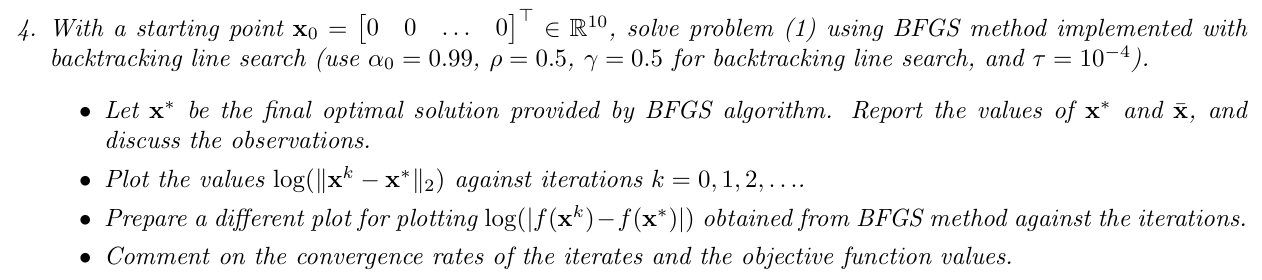

In [ ]:

def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -grad_fx(xk)
  while fx(xk + alpha*Bk@pk) > (fx(xk) + gamma*alpha*grad_fx(xk)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, max_iter=500):
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = grad_fx(xk)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk)
    xnext = xk - alpha*(Bk@pk)

    # print("new xk: ", xk[0:5])
    ## new Bk+1 computation
    sk = xnext - xk
    yk = grad_fx(xnext) - grad_fx(xk)
    # BFGS update formula
    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = grad_fx(xk)
    # print("grad is: ", pk[0:5])
    # print("grad norm is: ", norm(pk))
    xks.append(xk)
    count += 1

  return count, xk, fx(xk), xks


alpha0 = 0.99
rho = 0.5
gamma = 0.5
tau = 1e-4
x0 = [0 for i in range(10)]
start = time.time()
count, minimizer, minimum, xks=bfgs(x0,tau, alpha0, rho, gamma)
bfgstime = time.time() - start
print(f"total iterations: {count} | minimizer: {minimizer[0:5]} | minimum: {minimum} | type : BFGS")
print("----------------------------------------------------------------")



total iterations: 18 | minimizer: [-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195] | minimum: 505.64732952455114 | type : BFGS
----------------------------------------------------------------


In [ ]:
print(xbar)

[-1.06258705  2.94307072 -3.34150552  4.58252615 -5.75947573  6.93512469
 -7.61893094  8.16818187 -9.2179964  10.00022174]


In [ ]:
print(minimizer)

[-1.04982253  2.95189743 -3.34298192  4.60956007 -5.71176195  6.89877618
 -7.62879358  8.16821111 -9.22221199 10.05669293]


BFGS also converges fast, though not as fast as Newton. But BFGS does not need to compute inverse of hessian

<ipython-input-63-1d51c6be5c61>:1: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(norm(minimizer-xk)) for xk in xks]


Text(0.5, 1.0, 'Plot of log norm of ||xbar-xk|| in iterations')

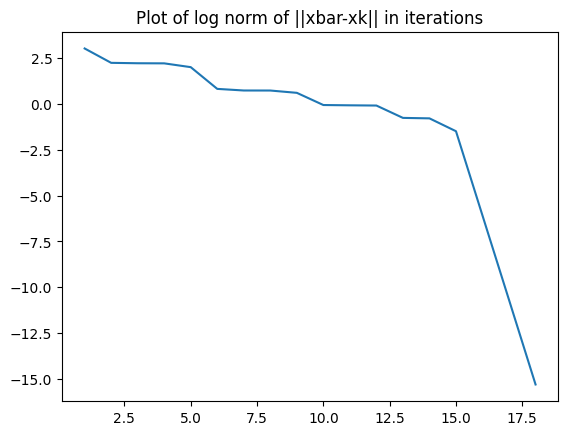

In [ ]:
norms = [np.log(norm(minimizer-xk)) for xk in xks]
iterations = [i+1 for i in range(count+1)]
plt.plot(iterations, norms)
plt.title("Plot of log norm of ||xbar-xk|| in iterations")

<ipython-input-64-4d94b89e11a2>:1: RuntimeWarning: divide by zero encountered in log
  norms = [np.log(abs(fx(minimizer)-fx(xk))) for xk in xks]


Text(0.5, 1.0, 'Plot of log absolute of function values difference vs iterations')

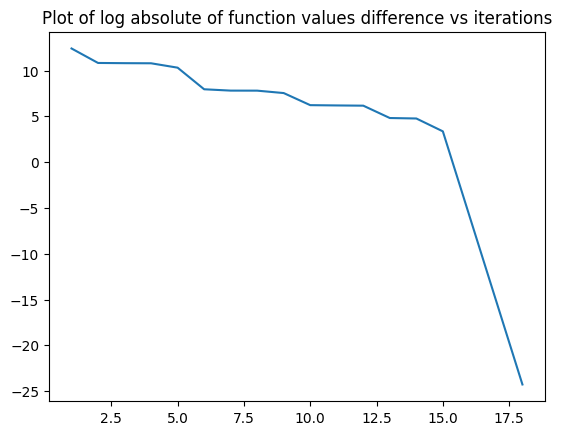

In [ ]:
norms = [np.log(abs(fx(minimizer)-fx(xk))) for xk in xks]
iterations = [i+1 for i in range(count+1)]
plt.plot(iterations, norms)
plt.title("Plot of log absolute of function values difference vs iterations")

Convergence of the iterates:

In linear regression, the optimization problem is convex, which means that BFGS can converge rapidly in terms of the sequence of iterates.
The iterates generated by BFGS are likely to converge towards the optimal solution, as long as the problem is well-conditioned and the objective function is smooth.
BFGS may exhibit superlinear or quadratic convergence for the sequence of iterates, particularly when the initial guess is reasonably close to the optimal solution and the problem is well-behaved.
Convergence of the objective function values:

The objective function in linear regression typically measures the discrepancy between the predicted values and the actual target values.
BFGS aims to minimize this objective function, meaning it seeks to reduce the error between the predicted and actual values of the dependent variable.
The convergence of the objective function values depends on the convergence of the iterates. As BFGS converges towards the optimal solution, the objective function values should decrease over iterations.
The convergence rate of the objective function values may vary depending on factors such as the conditioning of the problem, the choice of regularization (if any), and the presence of outliers or noise in the data.

Times for BFGS and Newtons

In [ ]:
print("Time Taken by Newton: ", newtontime)
print("Time taken by BFGS: ", bfgstime)

Time Taken by Newton:  0.01587653160095215
Time taken by BFGS:  0.0206143856048584


Time take by BFGS is more than Newton